In [1]:
'''Grading Quarantine Patients on the basis of their distance from house and time period.'''
import pandas as pd

In [2]:
'''Calculating distance'''
import math
def calculatingDistance(home_lat,home_long,live_lat,live_long):
    '''Distance between 2 points'''
    dist = math.sqrt(((home_lat-live_lat)**2)+((home_long-live_long)**2))
    return dist

In [3]:
'''Co-ordinates of residence'''
home_lat = 28.525631
home_long = 77.159187
'''Location Dataset'''
'''Location Dataset'''
lat_df = [28.529217,28.531328,28.533741,28.532534,28.531328]
long_df = [77.145389,77.168381,77.157056,77.153968,77.153281]
lat_df = pd.Series(lat_df, name = "Latitude")
long_df = pd.Series(long_df, name = "Longitude")
location_df = pd.concat([lat_df,long_df],axis = 1)
print(location_df)

    Latitude  Longitude
0  28.529217  77.145389
1  28.531328  77.168381
2  28.533741  77.157056
3  28.532534  77.153968
4  28.531328  77.153281


In [4]:
distance = list()
for location in zip(location_df["Latitude"],location_df["Longitude"]):
    distance.append(calculatingDistance(home_lat,home_long,location[0],location[-1]))
print(distance)

[0.01425637401305892, 0.010815981000346649, 0.008385300292774248, 0.00865386445467768, 0.00820589087180227]


In [5]:
grades = [2,2,0,0,0]
for i in range(5):
    print(distance[i],grades[i],end="\n")

0.01425637401305892 2
0.010815981000346649 2
0.008385300292774248 0
0.00865386445467768 0
0.00820589087180227 0


In [6]:
grades = pd.Series(grades,name = "Grades")
distance = pd.Series(distance, name = "Distance")
distance_grades = pd.concat([distance,grades],axis = 1)

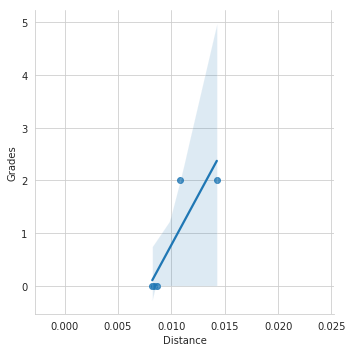

In [7]:
'''Visualization'''
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.lmplot(x="Distance",y="Grades",data = distance_grades)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [9]:
dist = distance_grades["Distance"].to_numpy().reshape(1,-1)
grade = distance_grades["Grades"].to_numpy().reshape(1,-1)
test_list = [0.014,0.001,0.01,0.0001,0.0018]
test_data = np.asarray(test_list,dtype="float").reshape(1, -1)
print(test_data)

[[0.014  0.001  0.01   0.0001 0.0018]]


In [10]:
regressionModel = LinearRegression()
regressionModel.fit(dist,grade)
regressionModel.predict(test_data)

array([[2., 2., 0., 0., 0.]])